In [3]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
data_dir="C:\\Users\\Rania\\Downloads\\datasat\\Train"

In [5]:
# Initialize lists to store emotions and file paths
file_emotion = []
file_path = []

# Loop through the dataset directory
emotion_folders = os.listdir(data_dir)  # Names of folders (Anger, Disgust, etc.)

print("Processing the following folders:")
print(emotion_folders)  # Display the folders being processed

for folder in emotion_folders:
    folder_path = os.path.join(data_dir, folder)  # Full path to the folder
    if os.path.isdir(folder_path):  # Ensure it's a folder
        print(f"Processing folder: {folder}")  # Debug: Check which folder is being processed
        files = os.listdir(folder_path)  # List all files in the folder
        print(f"Found {len(files)} files in {folder}")  # Debug: Number of files in the folder
        for file in files:
            file_path_full = os.path.join(folder_path, file)  # Full path to the file
            if file.endswith(".wav"):  # Process only WAV files
                try:
                    file_emotion.append(folder.lower())  # Use folder name as emotion
                    file_path.append(file_path_full)  # Append the file path
                except Exception as e:
                    print(f"Error processing file: {file}, Error: {e}")
            else:
                print(f"Skipping non-wav file: {file}")  # Debug: Skipping non-WAV files

# Create DataFrame for emotions and paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combine both DataFrames
dataset_df = pd.concat([emotion_df, path_df], axis=1)
# Display the first few rows of the DataFrame
print(dataset_df.head())
#print(dataset_df.to_string())

# Save the DataFrame to a CSV file for inspection
dataset_df.to_csv("emotion_dataset.csv", index=False)
print("Dataset saved to 'emotion_dataset.csv'")
#print(dataset_df.to_string())


Processing the following folders:
['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']
Processing folder: Anger
Found 520 files in Anger
Processing folder: Disgust
Found 520 files in Disgust
Processing folder: Fear
Found 520 files in Fear
Processing folder: Happiness
Found 520 files in Happiness
Processing folder: Neutral
Found 520 files in Neutral
Processing folder: Sadness
Found 520 files in Sadness
Processing folder: Surprise
Found 520 files in Surprise
  Emotions                                               Path
0    anger  C:\Users\Rania\Downloads\datasat\Train\Anger\a...
1    anger  C:\Users\Rania\Downloads\datasat\Train\Anger\a...
2    anger  C:\Users\Rania\Downloads\datasat\Train\Anger\a...
3    anger  C:\Users\Rania\Downloads\datasat\Train\Anger\a...
4    anger  C:\Users\Rania\Downloads\datasat\Train\Anger\a...
Dataset saved to 'emotion_dataset.csv'


In [6]:
dataset_df.tail()  # عرض آخر 5 صفوف لمعرفة ما إذا كانت عواطف أخرى موجودة

Emotions                                               Path
3635  surprise  C:\Users\Rania\Downloads\datasat\Train\Surpris...
3636  surprise  C:\Users\Rania\Downloads\datasat\Train\Surpris...
3637  surprise  C:\Users\Rania\Downloads\datasat\Train\Surpris...
3638  surprise  C:\Users\Rania\Downloads\datasat\Train\Surpris...
3639  surprise  C:\Users\Rania\Downloads\datasat\Train\Surpris...

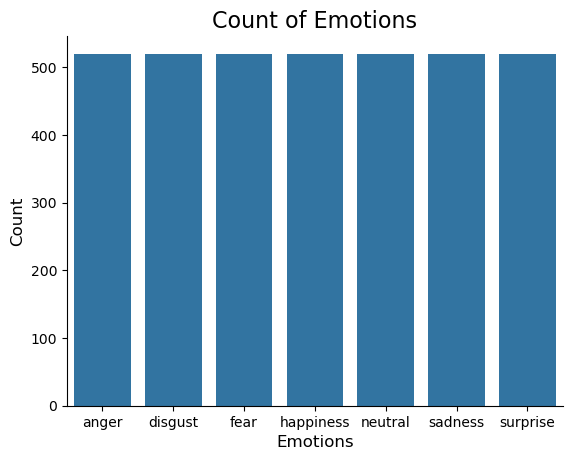

In [7]:
# Title for the plot
plt.title('Count of Emotions', size=16)

# Create countplot for the Emotions column in dataset_df
sns.countplot(x='Emotions', data=dataset_df)

# Label the axes
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

# Remove the top, right, left, and bottom spines for a cleaner look
sns.despine(top=True, right=True, left=False, bottom=False)

# Show the plot
plt.show()

In [8]:
# Function to create waveplot for audio
def create_waveplot(file_path, e):
    # Load the audio file using librosa
    data, sr = librosa.load(file_path)  # sr: sampling rate
    
    # Plot the waveform using matplotlib
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    plt.plot(data)  # Plot the audio data
    plt.ylabel('Amplitude')
    plt.xlabel('Time (samples)')
    plt.show()

# Function to create spectrogram for audio
def create_spectrogram(file_path, e):
    # Load the audio file using librosa
    data, sr = librosa.load(file_path)  # sr: sampling rate
    
    # STFT: Short Term Fourier Transform
    X = librosa.stft(data) # تحويل فورييه قصير المدى (Short Term Fourier Transform)
    Xdb = librosa.amplitude_to_db(abs(X))  # Convert amplitude to decibel scale
    
    # Plot the spectrogram using librosa
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')  # y_axis='log' could be another option
    plt.colorbar()
    plt.show()

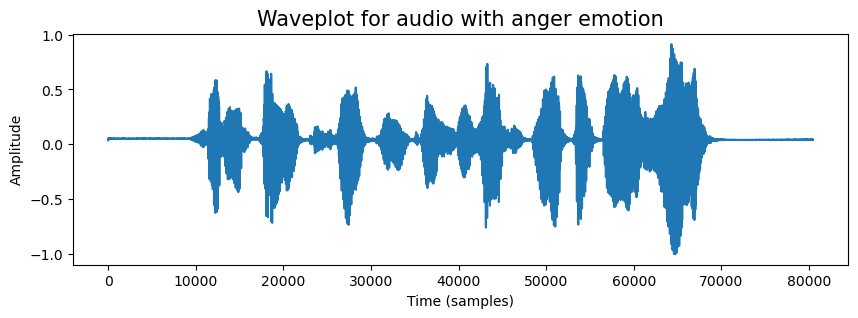

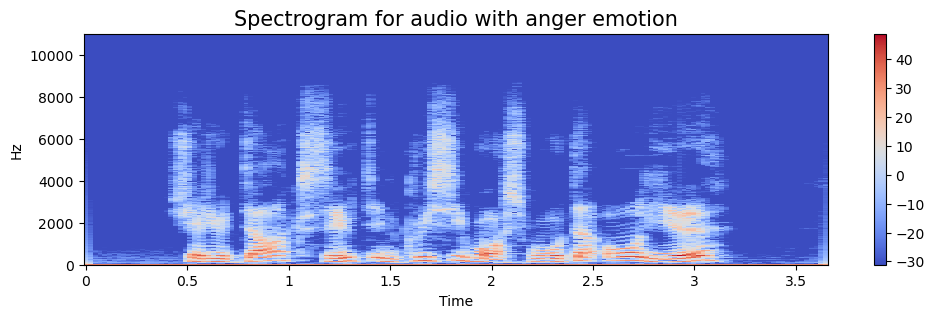

In [9]:
# Example usage for the first row in the dataset
file_path = dataset_df['Path'][0]  # Path to the audio file
emotion = dataset_df['Emotions'][0]  # Emotion associated with the file

# Call the waveplot function
create_waveplot(file_path, emotion)

# Call the spectrogram function
create_spectrogram(file_path, emotion)


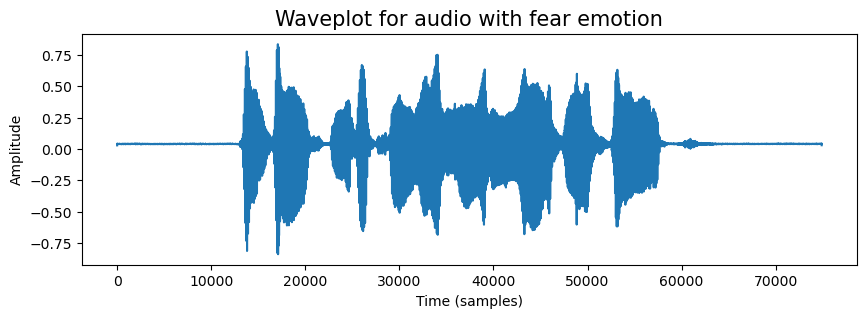

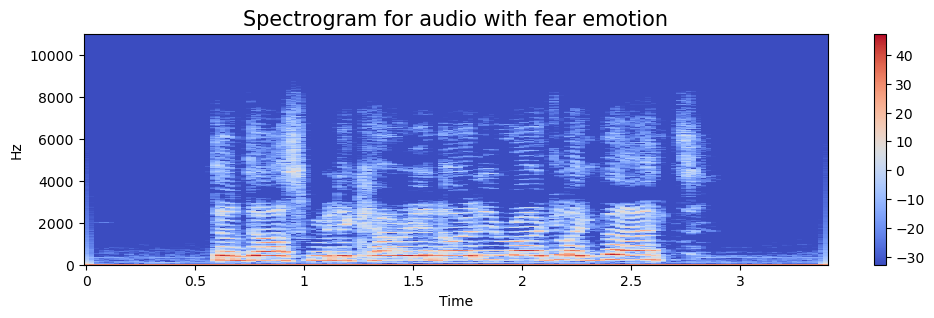

In [10]:
# Assuming data_path is your DataFrame containing emotions and file paths
emotion = 'fear'
path = np.array(dataset_df.Path[dataset_df.Emotions == emotion])[1]  # Select the second file with emotion 'fear'

# Load the audio data and sampling rate using librosa
data, sampling_rate = librosa.load(path)

# Call the create_waveplot function
create_waveplot(path, emotion)

# Call the create_spectrogram function
create_spectrogram(path, emotion)

# Play the audio (using IPython's Audio display function)
Audio(path)

Available emotions in dataset: ['anger' 'disgust' 'fear' 'happiness' 'neutral' 'sadness' 'surprise']


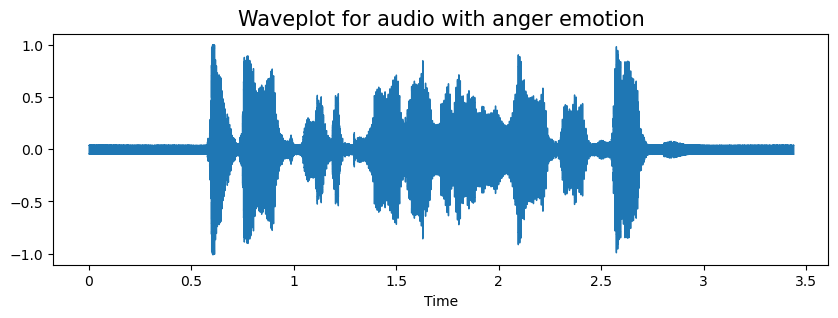

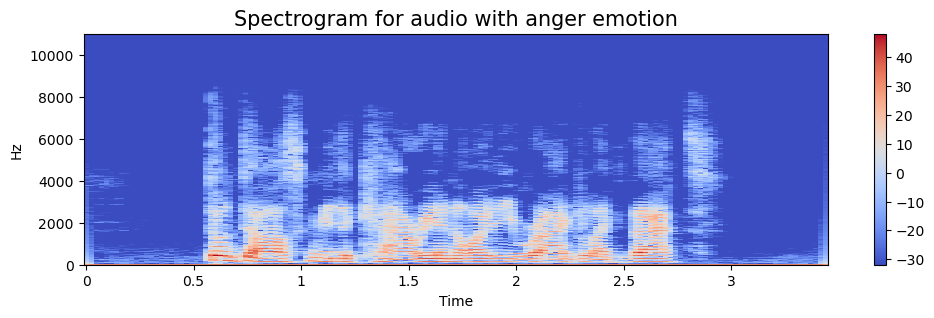

In [11]:
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
def create_spectrogram(data, sr, emotion):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()
    plt.show()    
# تأكد من وجود القيم التي تبحث عنها في عمود Emotions
emotion = 'anger'
# عرض القيم الفريدة في عمود Emotions للتأكد من وجود العاطفة المحددة
print("Available emotions in dataset:", dataset_df['Emotions'].unique())
path = np.array(dataset_df.Path[dataset_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

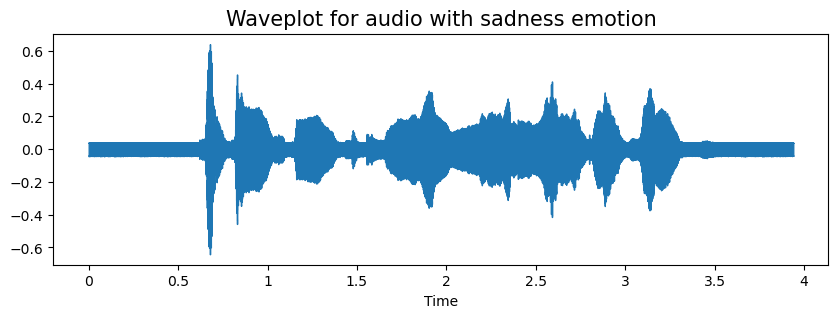

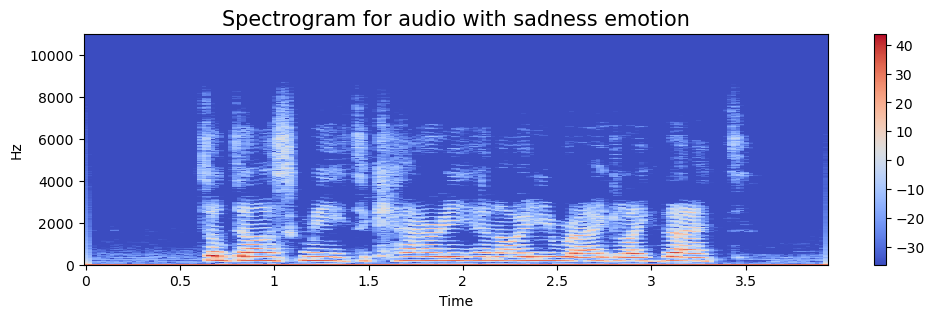

In [12]:
emotion='sadness'
path = np.array(dataset_df.Path[dataset_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

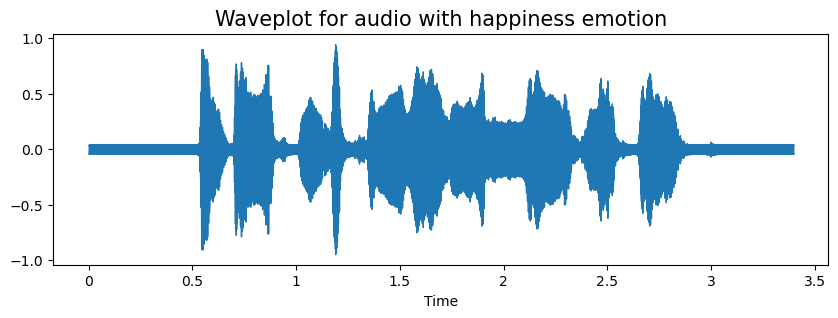

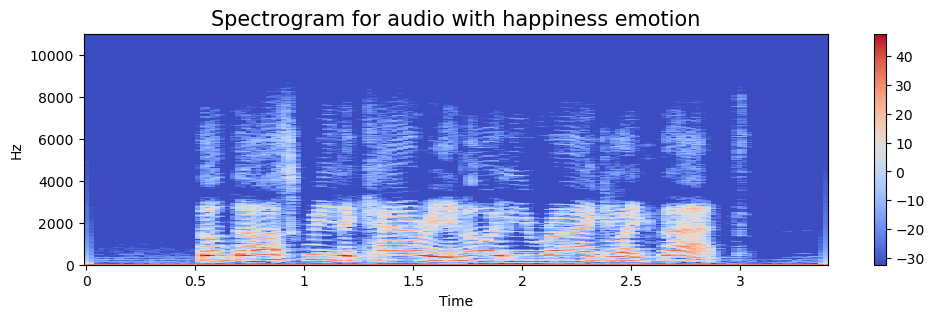

In [13]:
emotion='happiness'
path = np.array(dataset_df.Path[dataset_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

Data Augmentation
Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
In order to this to work adding the perturbations must conserve the same label as the original training sampl

In [15]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=1.0):
    try:
        # استخدام المعدل بشكل صحيح كقيمة لمفتاح
        stretched_data = librosa.effects.time_stretch(data, rate=rate)
        print("Stretched data length:", len(stretched_data))  # التحقق من طول البيانات بعد التحويل
        return stretched_data
    except Exception as e:
        print(f"Error during stretching: {e}")
        return np.array([])  # إرجاع مصفوفة فارغة في حالة حدوث خطأ

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

path = r'C:\\Users\\Rania\\Downloads\\datasat\\Train\\Disgust\\d05.wav'  # قم بتحديد اسم الملف الصوتي هنا
data, sample_rate = librosa.load(path)

# تعريف دالة تغيير البيتش
def pitch_shift(data,sample_rate, n_steps=2):

    return librosa.effects.pitch_shift(data,sr=sample_rate, n_steps=n_steps)

1. Simple Audio

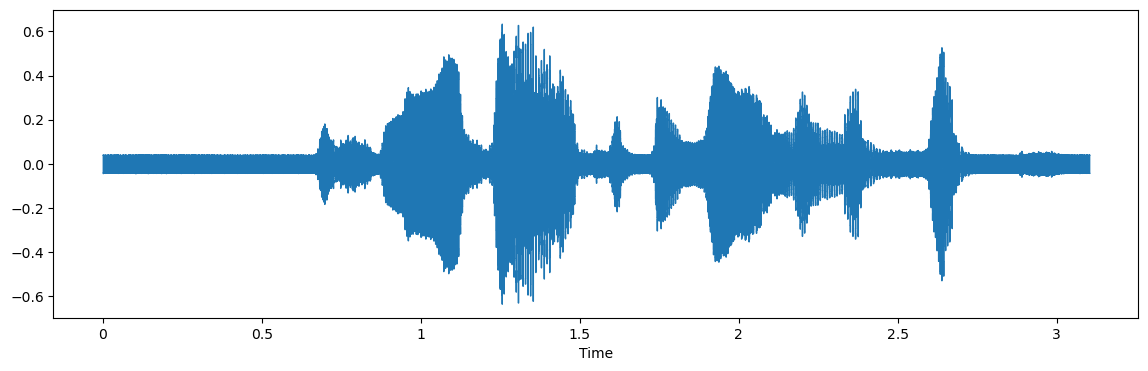

In [17]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

2. Noise Injection

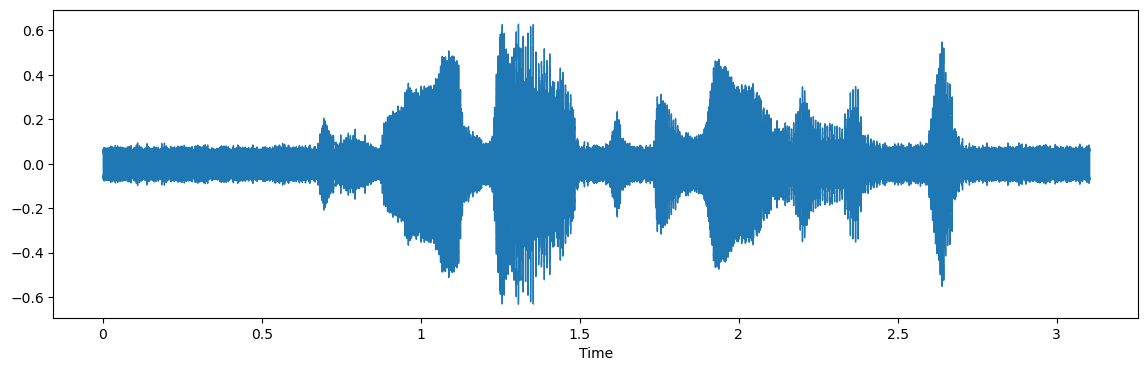

In [19]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

3. Stretching

Original data length: 68415
Stretched data length: 57012


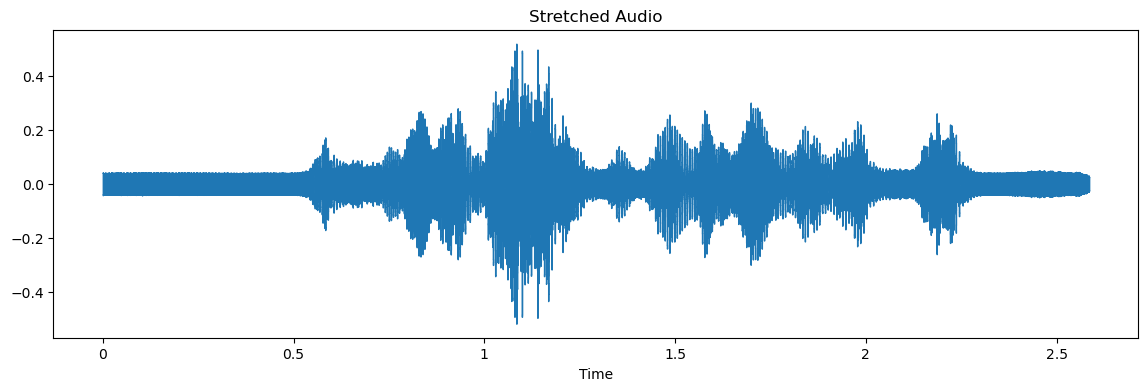

In [21]:
# إذا كانت البيانات الصوتية محملة بشكل صحيح
if data is not None and len(data) > 0:
    print("Original data length:", len(data))  # التحقق من طول البيانات الأصلية

    # تطبيق التمدد باستخدام stretch
    x = stretch(data, rate=1.2)  # المعدل هنا يمكن أن يكون 1.2 أو أي قيمة تناسبك

    # التحقق من أن البيانات المحولة ليست فارغة
    if len(x) > 0:
        # عرض الموجة الصوتية المعدلة
        plt.figure(figsize=(14, 4))
        librosa.display.waveshow(y=x, sr=sampling_rate)
        plt.title('Stretched Audio')
        plt.show()

        # لتشغيل الصوت باستخدام Audio
        Audio(x, rate=sampling_rate)
    else:
        print("Error: Processed data is empty.")
else:
    print("Error: Original data is empty or not loaded correctly.")


4. Shifting

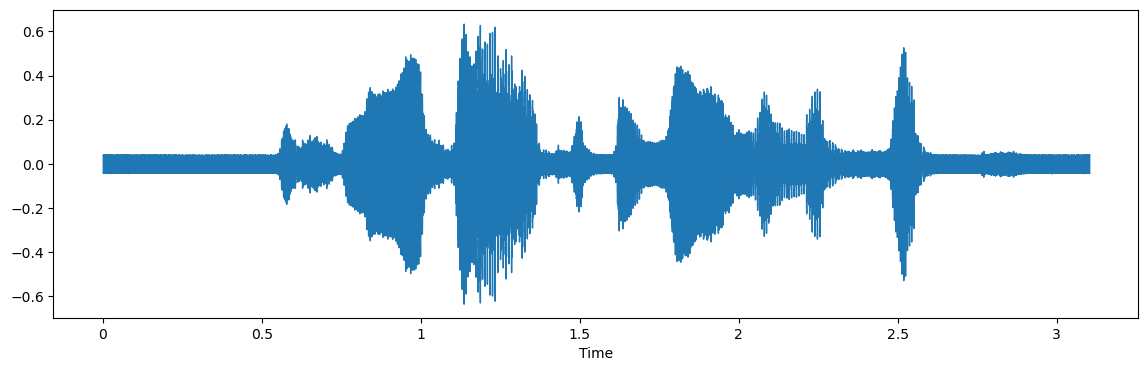

In [23]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

5. Pitch

تشغيل الصوت الأصلي قبل تعديل البيتش:


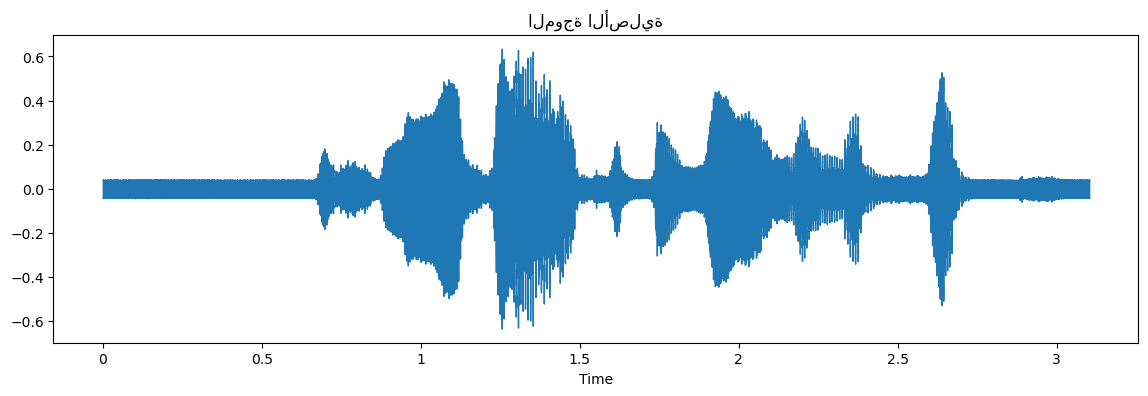

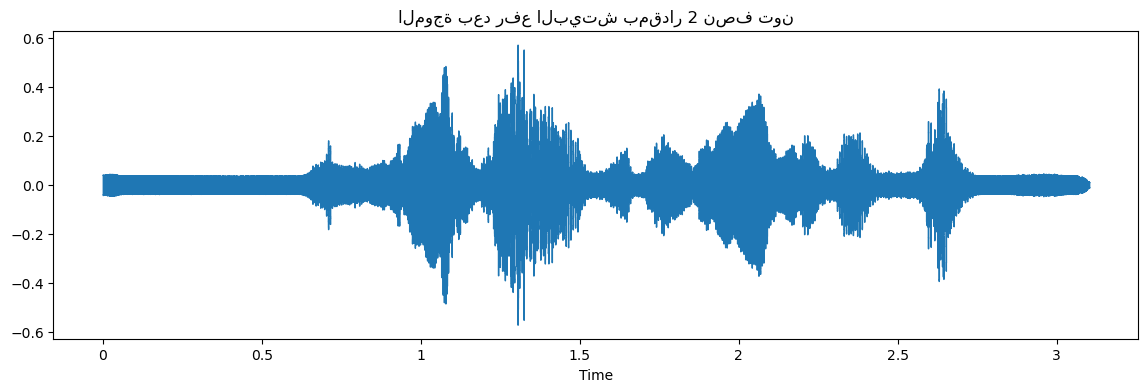

تشغيل الصوت بعد تعديل البيتش:


In [25]:
path = 'C:\\Users\\Rania\\Downloads\\datasat\\Train\\Disgust\\d05.wav'
data, sample_rate = librosa.load(path)  # تحميل الصوت

print("تشغيل الصوت الأصلي قبل تعديل البيتش:")
display(Audio(data, rate=sample_rate))  # عرض الصوت قبل تعديل البيتش

# عرض الموجة الأصلية (قبل تغيير البيتش)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('الموجة الأصلية')
plt.show()

# تغيير البيتش (رفع الصوت بمقدار 2 نصف تون)
pitch_data_up = pitch_shift(data,sample_rate, n_steps=2)

# عرض الموجة بعد رفع البيتش
plt.figure(figsize=(14, 4))
librosa.display.waveshow(pitch_data_up, sr=sample_rate)
plt.title('الموجة بعد رفع البيتش بمقدار 2 نصف تون')
plt.show()

# تشغيل الصوت بعد تعديل البيتش (رفع الصوت)
print("تشغيل الصوت بعد تعديل البيتش:")
display(Audio(pitch_data_up, rate=sample_rate))

In [26]:
def extract_features(data, sample_rate):
    result = np.array([])

    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC — ناخذ المتوسط فقط حتى يكون ثابت الطول (40,)
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
    mfcc_mean = np.mean(mfcc.T, axis=0)  # الشكل النهائي (40,)
    result = np.hstack((result, mfcc_mean))

    # RMS
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result  # النتيجة النهائية يكون فيها طول ثابت لجميع الملفات

def get_features(path):
    # تحميل الصوت
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    result = []

    # أصل البيانات
    res1 = extract_features(data, sample_rate)
    result.append(res1)

    # بيانات بها ضوضاء (إذا كان لديك دالة noise هنا)
    noise_data = noise(data)  # تأكد من أن هذه الدالة متاحة
    res2 = extract_features(noise_data, sample_rate)
    result.append(res2)

    # تمديد وتغيير pitch (إذا كانت دوال `stretch` و `pitch_shift` موجودة)
    new_data = stretch(data)  # تأكد من أن هذه الدالة متاحة
    data_stretch_pitch = pitch_shift(new_data, sample_rate)  # تأكد من أن هذه الدالة متاحة
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result.append(res3)

    return result 

In [27]:
X, Y = [], []

for path, emotion in zip(dataset_df.Path, dataset_df.Emotions):
    features = get_features(path)
    for f in features:
        if f.shape == features[0].shape:  # تأكد أن كل العناصر بنفس الشكل
            X.append(f)
            Y.append(emotion)
        else:
            print(f"Skipped due to shape mismatch: {path}")

X = np.array(X)
Y = np.array(Y)

print("X shape:", X.shape)
print("Y shape:", Y.shape)


Stretched data length: 55125
Stretched data length: 55125
Stretched data length: 32535
Stretched data length: 46864
Stretched data length: 52874
Stretched data length: 55125
Stretched data length: 45945
Stretched data length: 55125
Stretched data length: 55125
Stretched data length: 55125
Stretched data length: 20051
Stretched data length: 21259
Stretched data length: 22087
Stretched data length: 21881
Stretched data length: 20596
Stretched data length: 21877
Stretched data length: 23136
Stretched data length: 24036
Stretched data length: 19456
Stretched data length: 23042
Stretched data length: 45365
Stretched data length: 21495
Stretched data length: 20285
Stretched data length: 19726
Stretched data length: 20521
Stretched data length: 20751
Stretched data length: 24158
Stretched data length: 19911
Stretched data length: 24161
Stretched data length: 19494
Stretched data length: 23209
Stretched data length: 55125
Stretched data length: 21203
Stretched data length: 20002
Stretched data

In [28]:
len(X), len(Y), dataset_df.Path.shape

(10920, 10920, (3640,))

In [29]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.038891  0.470762  0.580042  0.556164  0.485299  0.460506  0.484227   
1  0.094297  0.579943  0.687646  0.667458  0.606133  0.597169  0.579970   
2  0.045062  0.426467  0.337536  0.417753  0.561246  0.574811  0.481293   
3  0.033904  0.662605  0.704369  0.623005  0.550529  0.483566  0.450042   
4  0.062482  0.605043  0.722896  0.780872  0.715910  0.646184  0.562630   

          7         8         9  ...       173       174       175       176  \
0  0.506228  0.460546  0.536092  ...  0.000008  0.000002  0.000001  0.000001   
1  0.575979  0.558620  0.620315  ...  0.042161  0.042767  0.041119  0.043460   
2  0.435848  0.460505  0.508285  ...  0.000170  0.000088  0.000044  0.000018   
3  0.422957  0.463125  0.555203  ...  0.000092  0.000085  0.000075  0.000069   
4  0.495375  0.488704  0.537342  ...  0.023060  0.021446  0.022234  0.020775   

        177           178           179           180           181  labels  
0  0.000001  9.651800e-07  8.815933e-07  6.204343e-07  1.810680e-07   anger  
1  0.043138  4.264316e-02  4.377335e-02  4.405615e-02  4.282874e-02   anger  
2  0.000005  1.376196e-06  5.834038e-07  3.697341e-07  9.346503e-08   anger  
3  0.000061  5.409915e-05  4.848720e-05  3.427215e-05  8.903367e-06   anger  
4  0.021166  2.210568e-02  2.199362e-02  2.126914e-02  2.080025e-02   anger  

[5 rows x 183 columns]

In [30]:
from IPython.display import FileLink

FileLink('features.csv')

C:\Users\Rania\Downloads\features.csv

In [31]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [32]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [33]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (8190, 182)
x_test shape: (2730, 182)
y_train shape: (8190, 7)
y_test shape: (2730, 7)


In [34]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8190, 182), (8190, 7), (2730, 182), (2730, 7))

In [35]:
if len(y_train.shape) == 1:  # يعني أنها ليست one-hot
    y_train = to_categorical(y_train, num_classes=7)
    y_test = to_categorical(y_test, num_classes=7)

In [36]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8190, 182, 1), (8190, 7), (2730, 182, 1), (2730, 7))

Modelling

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras import regularizers

model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())

# إضافة L2 regularization للطبقة الكثيفة
model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))

# طبقة الإخراج
model.add(Dense(units=7, activation='softmax'))

# تجميع النموذج
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# عرض ملخص النموذج
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 182, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 91, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 46, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 46, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 23, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        24,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 559,303 (2.13 MB)

 Trainable params: 559,303 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (8190, 182, 1)
x_test shape: (2730, 182, 1)


In [40]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 46s 308ms/step - accuracy: 0.2639 - loss: 2.1620 - val_accuracy: 0.7194 - val_loss: 1.0672 - learning_rate: 0.0010
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 305ms/step - accuracy: 0.6248 - loss: 1.1571 - val_accuracy: 0.8150 - val_loss: 0.6419 - learning_rate: 0.0010
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 49s 366ms/step - accuracy: 0.7544 - loss: 0.8081 - val_accuracy: 0.8370 - val_loss: 0.5574 - learning_rate: 0.0010
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 74s 303ms/step - accuracy: 0.7852 - loss: 0.6733 - val_accuracy: 0.8381 - val_loss: 0.5375 - learning_rate: 0.0010
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - accuracy: 0.8213 - loss: 0.5906 - val_accuracy: 0.8546 - val_loss: 0.5024 - learning_rate: 0.0010
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 303ms/step - accuracy: 0.8343 - loss: 0.5298 - val_accuracy: 0.8557 - val_loss: 0.4619 - learning_rate: 0.0010
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 46s 360ms/step - accuracy: 0.8

86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9328 - loss: 0.3073
Accuracy of our model on test data :  93.73626112937927 %


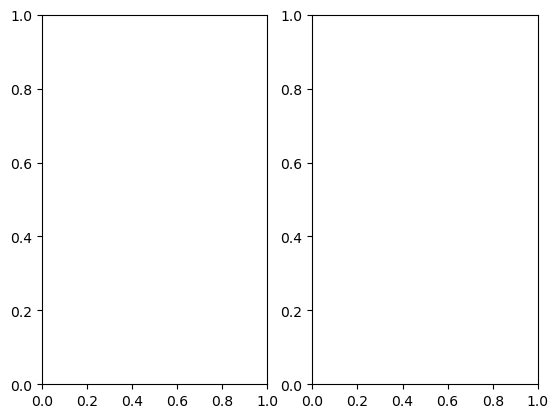

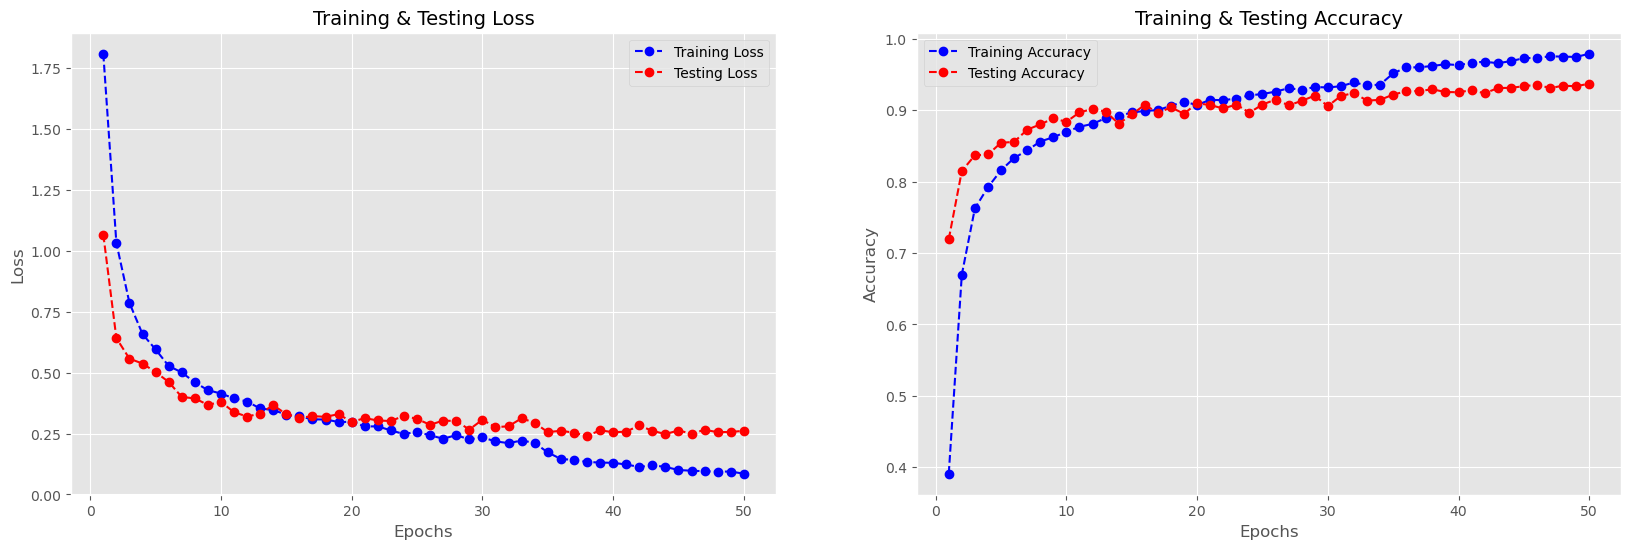

In [41]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

#epochs = [i for i in range(50)]
epochs = range(1, len(history.history['loss']) + 1)
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

plt.style.use('ggplot')  # تحسين الشكل العام للرسم البياني
fig , ax = plt.subplots(1,2, figsize=(20,6))

# رسم منحنى الخسارة
ax[0].plot(epochs , train_loss , label = 'Training Loss', color='blue', linestyle='dashed', marker='o')
ax[0].plot(epochs , test_loss , label = 'Testing Loss', color='red', linestyle='dashed', marker='o')
ax[0].set_title('Training & Testing Loss', fontsize=14)
ax[0].legend()
ax[0].set_xlabel("Epochs", fontsize=12)
ax[0].set_ylabel("Loss", fontsize=12)

# رسم منحنى الدقة
ax[1].plot(epochs , train_acc , label = 'Training Accuracy', color='blue', linestyle='dashed', marker='o')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy', color='red', linestyle='dashed', marker='o')
ax[1].set_title('Training & Testing Accuracy', fontsize=14)
ax[1].legend()
ax[1].set_xlabel("Epochs", fontsize=12)
ax[1].set_ylabel("Accuracy", fontsize=12)

plt.show()

In [42]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step


In [43]:
# Here the eventual problem

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
#df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)


Predicted Labels Actual Labels
0            anger         anger
1          neutral       neutral
2          neutral       neutral
3          disgust         anger
4          sadness       sadness
5         surprise     happiness
6         surprise     happiness
7          sadness       sadness
8          disgust       disgust
9         surprise      surprise

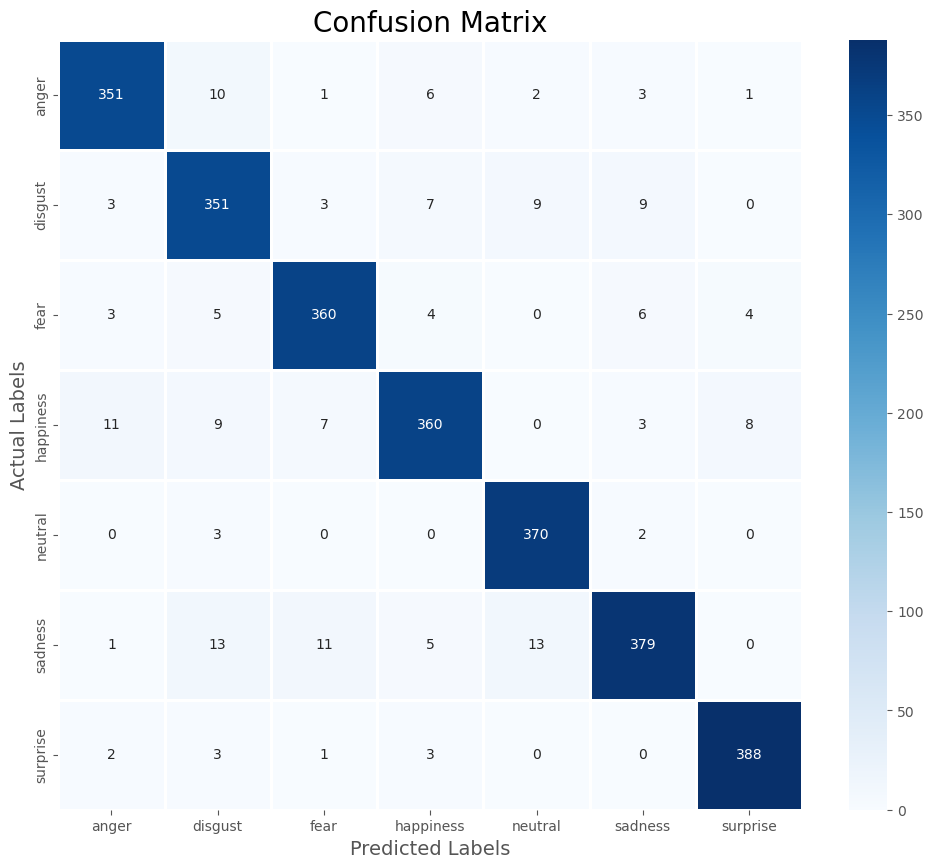

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.95      0.94      0.94       374
     disgust       0.89      0.92      0.90       382
        fear       0.94      0.94      0.94       382
   happiness       0.94      0.90      0.92       398
     neutral       0.94      0.99      0.96       375
     sadness       0.94      0.90      0.92       422
    surprise       0.97      0.98      0.97       397

    accuracy                           0.94      2730
   macro avg       0.94      0.94      0.94      2730
weighted avg       0.94      0.94      0.94      2730



In [46]:
model.save('C:\\Users\\Rania\\Downloads\\model\\modeleee.h5')

In [47]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [48]:
model.save('C:\\Users\\Rania\\Downloads\\model\\model.keras')